In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import math

In [2]:
# Importing data

DG = nx.read_gexf('../data_collection/data/network_connected.gexf')

# Nodes and edges

print("Total number of nodes: ", int(DG.number_of_nodes()))
print("Total number of edges: ", int(DG.number_of_edges()))

Total number of nodes:  12762
Total number of edges:  165568


Metrics to calculate:
+ Degree distribution analysis;
+ Connected components analysis; 
+ Path analysis;
+ Clustering Coefficient, Density analysis;
+ Centrality analysis

# Network analysis

In [3]:
# Converting to undirected graph 

G = nx.DiGraph.to_undirected(DG)

In [11]:
nx.is_connected(G)

True

In [12]:
# Nodes and edges

print("Total number of nodes: ", int(G.number_of_nodes()))
print("Total number of edges: ", int(G.number_of_edges()))

Total number of nodes:  12762
Total number of edges:  125539


In [13]:
# Avg degree

print('Avg degree: ',sum(dict(G.degree()).values())/float(len(G)))

Avg degree:  19.673875568092775


In [4]:
# Regime

# Connected
print('Connected: ')
print(sum(dict(G.degree()).values())/float(len(G)) > (math.log(G.number_of_nodes())))

Connected: 
True


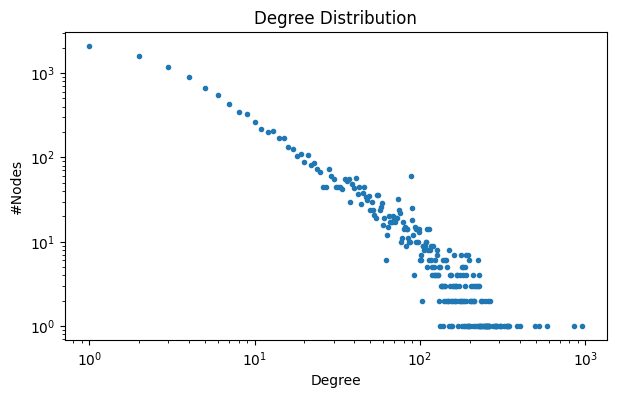

In [14]:
# Plotting Avg Degree

hist = nx.degree_histogram(G)
plt.figure(figsize=(7,4))
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

In [15]:
# Nodes with the highest degree

max_k = sorted(G.degree, key=lambda x: x[1], reverse=True)
max_k

[('World War II', 960),
 ('Military', 853),
 ('World War I', 590),
 ('Human rights', 523),
 ('Democracy', 496),
 ('War', 402),
 ('Communism', 386),
 ('Internet', 346),
 ('English language', 341),
 ('Terrorism', 339),
 ('Political science', 335),
 ('Noam Chomsky', 331),
 ('War crime', 322),
 ('Liberalism', 307),
 ('Anarchism', 306),
 ('Child abuse', 303),
 ('Anti-war movement', 294),
 ('World war', 289),
 ('Political party', 288),
 ('Class conflict', 286),
 ('Freedom of speech', 284),
 ('Authoritarianism', 278),
 ('Political philosophy', 266),
 ('Social democracy', 266),
 ('Law of war', 263),
 ('Arms industry', 262),
 ('Military education and training', 261),
 ('Activism', 259),
 ('International law', 257),
 ('Executive (government)', 257),
 ('Karl Marx', 256),
 ('Index of education articles', 255),
 ('Children in the military', 254),
 ('Military history', 253),
 ('Peace', 251),
 ('Diplomacy', 249),
 ('Military tactics', 248),
 ('Legislature', 247),
 ('Public domain', 247),
 ('Propagand

In [16]:
# Density

density = nx.density(G)
print("Network density:", density)

Network density: 0.0015417189536942853


In [17]:
# Diameter

diameter = nx.diameter(G)
print("Diameter:", diameter)

Diameter: 10


In [18]:
# Average path lenght

apl = nx.average_shortest_path_length(G)
print("Average path length:", apl)

Average path length: 3.765571095553061


In [19]:
# Connected components analysis

cc = nx.connected_components(G)

cc_list = [len(c) for c in sorted(cc, key=len, reverse=True)]

cc_list[:20]

[12762]

In [20]:
print(len(cc_list))

1


In [21]:
# (Avg) Clustering coefficient

clust = nx.average_clustering(G)
print(clust)

0.35784218375589416


In [22]:
# Num of triangles

tri = nx.triangles(G)
print('The sum of all trinagles is ', sum(tri.values()))

tri = sorted(tri.items(), key=lambda x:x[1], reverse=True)
print(tri)

The sum of all trinagles is  4508214
[('World war', 16539), ('Military', 15792), ('Military education and training', 14916), ('War', 14562), ('Lawfare', 14081), ('War crime', 13830), ('Military history', 13725), ('Industrial warfare', 13643), ('Military tactics', 13635), ('Law of war', 13584), ('Modern warfare', 13537), ('Military policy', 13521), ('Military organization', 13515), ('Military science', 13480), ('Trench warfare', 13466), ('Military justice', 13454), ('Staff (military)', 13395), ('Command and control', 13358), ('Military branch', 13188), ('Children in the military', 13185), ('List of war crimes', 13134), ('Siege', 13111), ('Arms industry', 13069), ('Blitzkrieg', 13067), ('Attrition warfare', 13035), ('Total war', 12985), ('Scorched earth', 12964), ('Cyberwarfare', 12960), ('Maneuver warfare', 12944), ('Wartime sexual violence', 12923), ('Conventional warfare', 12922), ('Subterranean warfare', 12919), ('Military strategy', 12904), ('Airborne forces', 12895), ('List of mili

In [23]:
# Degree assortativity

assor = nx.degree_assortativity_coefficient(G)
print('Degree assortativity: ', assor)

Degree assortativity:  0.050224688418073093


In [24]:
# Category assortativity

assor = nx.attribute_assortativity_coefficient(G, attribute='category')
print('Category assortativity: ', assor)

Category assortativity:  0.5410417454522213


In [25]:
# Centrality analysis

# Betweenness centrality
bc = nx.betweenness_centrality(G)

bc = sorted(bc.items(), key=lambda x:x[1], reverse=True)

print('Betweenness centrality: ',bc)

Betweenness centrality:  [('World War II', 0.11755815472022914), ('Military', 0.07389843795334987), ('World War I', 0.040144400756956466), ('English language', 0.03289044891436298), ('Human rights', 0.031203692692516286), ('Internet', 0.028504700067305752), ('Democracy', 0.027260966241390374), ('Public domain', 0.022982587916302692), ('Ministry of finance', 0.020374129984406388), ('Activism', 0.01675804067503563), ('Non-governmental organization', 0.016196932212000248), ('Political science', 0.015886481149545453), ('Outline of academic disciplines', 0.014756101744353503), ('War', 0.014123887306717875), ('Terrorism', 0.013850873910213892), ('Television', 0.011804600247030157), ('Communism', 0.011495832241083135), ('Executive (government)', 0.011367058427036891), ('Financial law', 0.011278454049060497), ('International law', 0.011155384084345387), ('Freedom of speech', 0.01102290725321257), ('Political party', 0.010632322083538145), ('Index of education articles', 0.010404891101773638), 

In [26]:
# Closeness centrality

clos = nx.closeness_centrality(G)

clos = sorted(clos.items(), key=lambda x:x[1], reverse=True)

print(clos)

[('World War II', 0.4207940381191057), ('Democracy', 0.40151658171291926), ('Human rights', 0.3944180008654262), ('World War I', 0.3903043278788806), ('Military', 0.3901611275873666), ('International law', 0.382799376049916), ('Rule of law', 0.37974645875491014), ('Political science', 0.3794303044719315), ('Liberalism', 0.37905836922619934), ('War', 0.3783278980136377), ('Internet', 0.37790215588723053), ('Terrorism', 0.3776784657274772), ('World government', 0.3770312592329965), ('Freedom of speech', 0.3766640101537826), ('Egalitarianism', 0.37371873718737186), ('Communism', 0.37309592725784285), ('Age of Enlightenment', 0.3722144440555361), ('Anarchism', 0.3719323812299621), ('Political history of the world', 0.3715858132898492), ('Noam Chomsky', 0.37025968373712465), ('Public administration', 0.3701093419182691), ('Authoritarianism', 0.36992694805194803), ('Outline of academic disciplines', 0.3694664003011089), ('List of academic fields', 0.36871911930422724), ('Bureaucracy', 0.3686

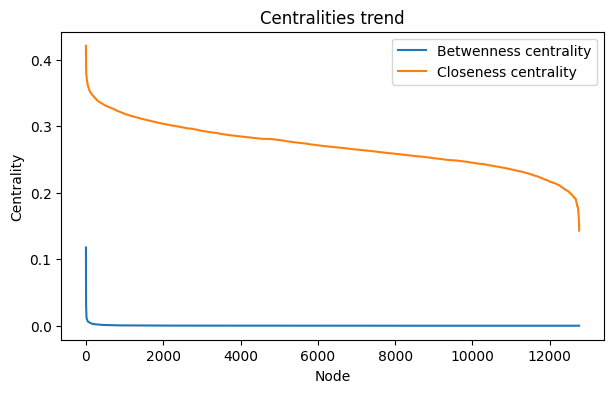

In [41]:
bc_val = [x[1] for x in bc]
clos_val = [x[1] for x in clos]

plt.figure(figsize=(7,4))
plt.plot(bc_val, label='Betwenness centrality')
plt.plot(clos_val, label='Closeness centrality')
plt.title('Centralities trend')
plt.xlabel("Node")
plt.ylabel("Centrality")
plt.legend()
plt.show()